# DCE MRI in the brain


We have obtained an arterial input function and a tissue curve, measured with dynamic contrast-enhanced MRI in a patient with an intracranial metastasis. 
The arterial input function was measured in the middle cerebral artery and corrected for partial volume effects with a reference measurement in the brain. The tissue curve was measured in the thalamus, a deep gray matter region.
Both curves were converted to concentrations using the absolute signal enhancement.

Before we do anything else, we import some libraries:

In [1]:
import numpy as np
import compartmentmodels.compartmentmodels as CM

# plotting and graphics settings
import matplotlib.pyplot as plt
import seaborn as sns # pretty graphics

# required for inline plotting
%pylab inline

sns.set_context("notebook")

Populating the interactive namespace from numpy and matplotlib


In a first step, we load the data and have a first look at the two curves.

In [2]:
time, aif, curve = CM.loaddata('tests/thalamus-data.csv')

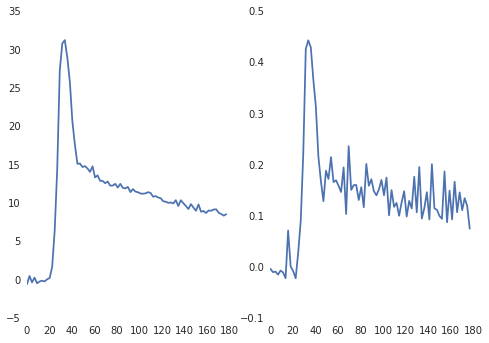

In [3]:
figure, axes = plt.subplots(1,2)
axes[0].plot(time, aif, label = "AIF")
axes[1].plot(time, curve, label = "Thalamus")

We observe the following:

* The temporal resolution is high - in particular, much higher than the bolus width.

* The measurement time is approximately three minutes.


In [4]:
# let us try an uptake model
model = CM.TwoCUModel(time, curve, aif, startdict={'Fp':20.0, 'vp': 1.5, 'PS':0.1})

In [5]:
model.fit_model()
print model.OptimizeResult
print model.phys_parameters

  status: 0
 success: True
    nfev: 125
     fun: 0.084487925798998026
       x: array([ 0.01039464,  0.80563191,  0.        ])
 message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     jac: array([  3.59656749e-05,  -3.96904731e-07,   5.68212563e-01])
     nit: 18
{'Fp': 62.367828294211648, 'PS': 0.0, 'E': 0.0, 'TP': 1.2412616633480342, 'vp': 1.2902465714646292, 'Iterations': 18}


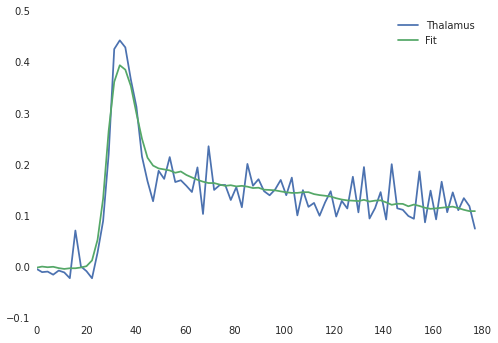

In [6]:
figure, axes = plt.subplots(1,1)
axes.plot(time, curve, label = "Thalamus")
axes.plot(time,model.fit, label="Fit")
plt.legend()

In [7]:
model.bootstrap()
print model.phys_parameters

{'Fp': 62.367828294211648, 'PS': 0.0, 'E': 0.0, 'mean estimate': {'Fp': 65.927285096326884, 'vp': 1.2640628596505092, 'E': 0.0, 'TP': 1.1609494533302369, 'PS': 0.0}, 'TP': 1.2412616633480342, 'vp': 1.2902465714646292, 'Iterations': 15, 'low estimate': {'Fp': 50.916766418885317, 'vp': 1.2331957318172944, 'E': 0.0, 'TP': 0.70609358868771277, 'PS': 0.0}, 'high estimate': {'Fp': 105.51402384111034, 'vp': 1.2947265948419029, 'E': 0.020239376439237445, 'TP': 1.5023964655883719, 'PS': 0.00028028885830737581}}


In [8]:
cxmodel = CM.TwoCXModel(time, curve, aif, startdict={'Fp':20.0, 'vp': 1.5, 'PS':0.1, 've':9.1})
cxmodel.fit_model()
print cxmodel.phys_parameters

{'Fp': 62.368690756804149, 'PS': 0.0, 'E': 0.0, 've': 0.0, 'TP': 1.2412440297951719, 'vp': 1.2902460841337413, 'Iterations': 29, 'TE': 2.4912701169814175}


In [9]:
onecmodel = CM.CompartmentModel(time, curve, aif, startdict={'F':20.0, 'v': 1.5})
onecmodel.fit_model()
print onecmodel.phys_parameters

{'v': 1.2902464832590426, 'Iterations': 15, 'MTT': 1.2412637575186398, 'F': 62.367718808047151}
